# **Análisis Estadístico de Redes Sociales: Taller 2**

## Valentina Cardona Saldaña

Desarrollo de los ejercicios propuestos en el [Taller 2](https://www.dropbox.com/scl/fi/gncmfys1f4vh4jn9b9klj/Taller_2.pdf?rlkey=ak00y804yao89stj5m19nief1&e=1&dl=0) de la asignatura [Análisis Estadístico de Redes Sociales](https://sites.google.com/view/juansosa/social-networks), impartida por el profesor [Juan Sosa](https://github.com/jstats1702) como parte del programa de la Maestría en Ciencias - Estadística de la Universidad Nacional de Colombia.

In [70]:
# Paquetes
import pandas as pd
import numpy as np
import random
import rdata
import xarray as xr

import igraph as ig
#import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [176]:
# FUNCIÓN PARA CALCULAR MEDIA GLOBAL DE INTERACCIONES

def MediaGlobal(Y):
    
    """
    Calcula la media global de las interacciones para una matriz de adyacencia dada.

    Parámetros:
        Y (pd.DataFrame): La matriz de adyacencia.

    Retorna:
        float: La media global de las interacciones.
    """
    
    ## Obtener n
    n = len(Y)
    ## Inicializar la suma de las interacciones
    E = 0
    
    ## Calcular la suma de las interacciones (excluyendo la diagonal principal)
    for i in range(n):
        for j in range(n):
            if i != j:
                E += Y.iloc[i, j]
    
    # Calcular la media global de las interacciones
    MediaGlobal_Interacciones = E / (n * (n - 1))
    
    return round(MediaGlobal_Interacciones, 3)

### Ejercicio 1

Reproducir los ejemplos 3.1, 3.2, 5.2, 5.3, 6.1 de [Conceptos fundamentales de teoría de grafos](https://rpubs.com/jstats1702/1126816) en Python usando igraph y/o NetworkX

#### 3.1 Ejemplo: Vecinos y Grado

In [2]:
# red no dirigida
g = ig.Graph.Formula("1-2, 1-3, 2-3, 2-4, 3-5, 4-5, 4-6, 4-7, 5-6, 6-7")

# Vértices
g.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3
3,4
4,5
5,6
6,7


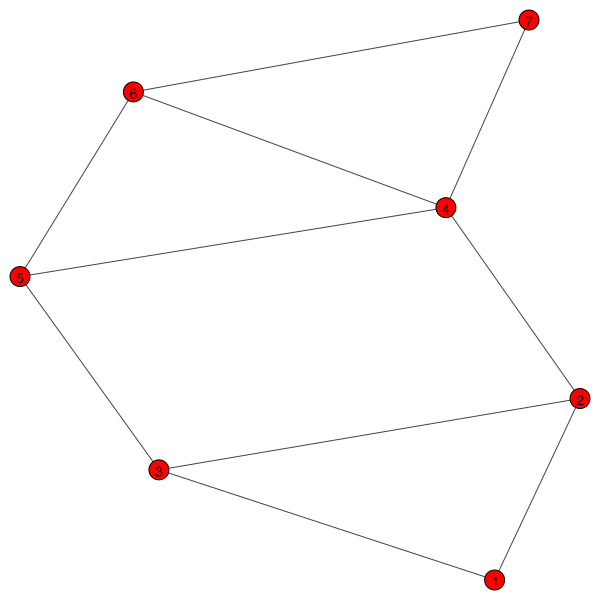

In [3]:
# visualización
random.seed(10)

## Guardar los nombres de los vértices
g.vs['label'] = range(1, g.vcount()+1)

ig.plot(g)

In [4]:
# vecinos del vértice 1
g.neighborhood(0) ## Se introduce el ID del vértice

## Arroja una lista que incluye al mismo vértice de primeras

[0, 1, 2]

In [5]:
# grados

## Imprimir lista de vértices
print(g.vs['name'])

## El grado de cada vértice
print(g.degree())

['1', '2', '3', '4', '5', '6', '7']
[2, 3, 3, 4, 3, 3, 2]


#### 3.2 Ejemplo: Grado de entrada y Grado de salida

In [6]:
# red dirigida
dg = ig.Graph.Formula("1->2, 1->3, 2<->3")

## Vértices
dg.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3


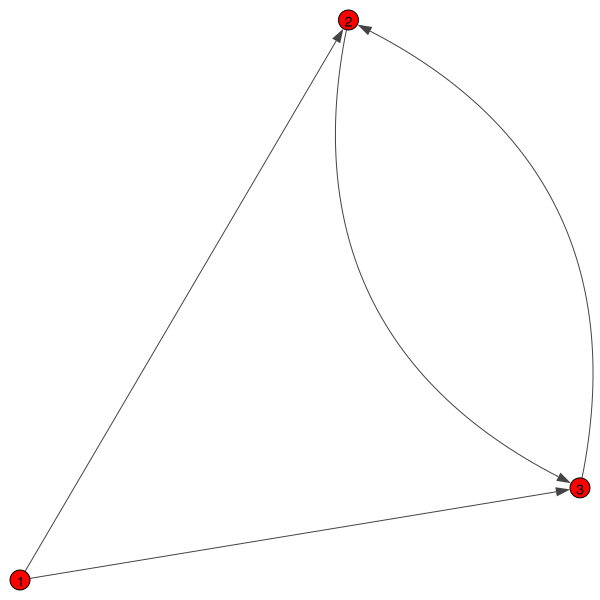

In [7]:
# visualización
random.seed(25)

## Guardar los nombres de los vértices
dg.vs['label'] = range(1, dg.vcount()+1)

ig.plot(dg)

In [8]:
# grado de entrada

## Imprimir lista de vértices
print(dg.vs['name'])
## Grado
print(dg.indegree())

['1', '2', '3']
[0, 2, 2]


In [9]:
# grado de salida

## Imprimir lista de vértices
print(dg.vs['name'])
## Grado
print(dg.outdegree())

['1', '2', '3']
[2, 1, 1]


#### 5.2 Ejemplo: Componentes

In [10]:
# red no dirigida
g = ig.Graph(edges = [[1,7], [2,7], [2,4], [3,6], [4,7], [5,11], [6,12], [7,8], [7,9], [7,10]])

## Agregar nombres a red
g.vs['name'] = range(g.vcount()+1)
## Eliminar vértice 0
g.delete_vertices(0)

## Vértices
g.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


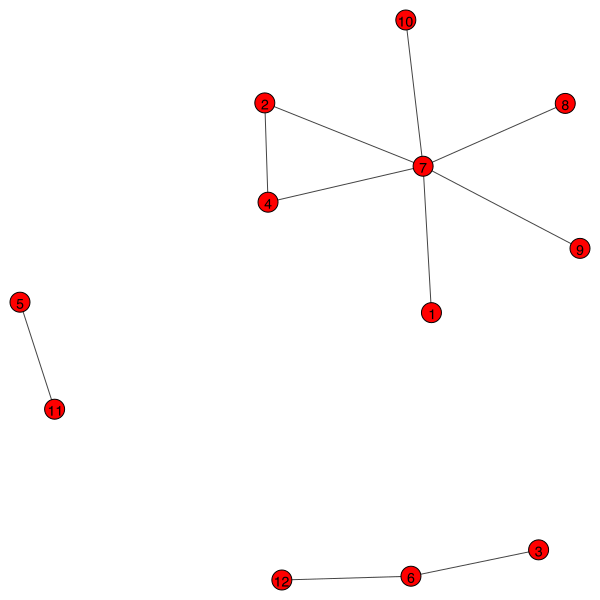

In [11]:
# visualización
random.seed(25)

## Guardar los nombres de los vértices
g.vs['label'] = range(1, g.vcount()+1)

ig.plot(g)

In [12]:
# conectado?
g.is_connected()

False

In [13]:
# componentes
components = g.connected_components()

print(components.summary(), end = "\n\n")

# membership
c = components.membership
print("membership")
print(g.vs['name'])
print(c, end = "\n\n")

# csize
print("csize")
print(components.sizes(), end = "\n\n")

# n
print("num")
print(components.__len__())

Clustering with 12 elements and 3 clusters

membership
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1]

csize
[7, 3, 2]

num
3


#### 5.3 Ejemplo: Conexión débil y fuerte

In [14]:
# red dirigida
dg = ig.Graph.Formula("1->2, 1->3, 2<->3")

## Vértices
dg.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3


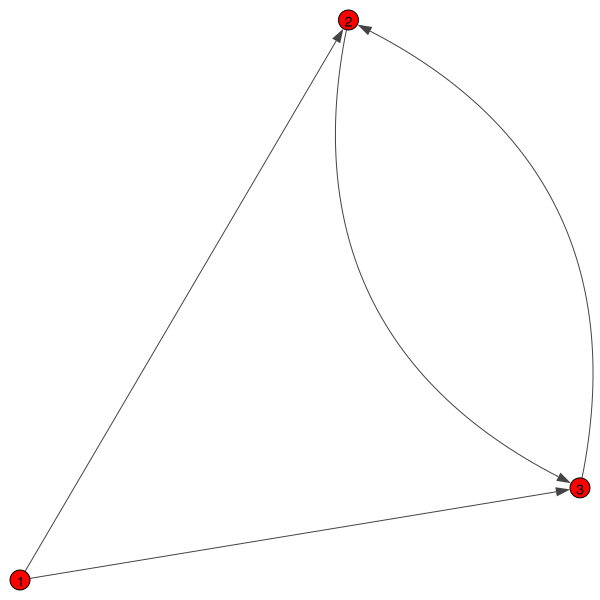

In [15]:
# visualización
random.seed(25)

## Guardar los nombres de los vértices
dg.vs['label'] = range(1, dg.vcount()+1)

ig.plot(dg)

In [16]:
# conectado débilmente?
dg.is_connected(mode = "weak")

True

In [17]:
# conectado fuertemente?
dg.is_connected(mode = "strong")

False

#### 6.1 Ejemplo: Distancias

In [18]:
# red no dirigida
g = ig.Graph.Formula("1-2, 1-3, 2-3, 2-4, 3-5, 4-5, 4-6, 4-7, 5-6, 6-7")

# Vértices
g.get_vertex_dataframe()

,name
vertex ID,
0,1
1,2
2,3
3,4
4,5
5,6
6,7


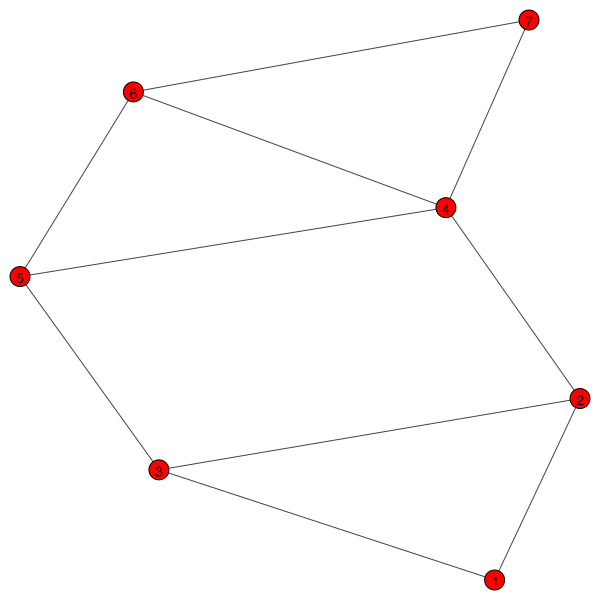

In [19]:
# visualización
random.seed(10)

## Guardar los nombres de los vértices
g.vs['label'] = range(1, g.vcount()+1)

ig.plot(g)

In [20]:
# distancia
g.distances(source = "1", target = "6")

[[3]]

In [21]:
# caminata

## vertex ID
print(g.get_shortest_paths(v = "1", to = "6"), end = "\n\n")

## nombres (sumar 1)
print(np.array(g.get_shortest_paths(v = "1", to = "6")) + 1)

[[0, 1, 3, 5]]

[[1 2 4 6]]


In [22]:
# caminatas

## vertex ID
print(g.get_all_shortest_paths(v = "1", to = "6"), end = "\n\n")

## nombres (sumar 1)
print(np.array(g.get_all_shortest_paths(v = "1", to = "6")) + 1)

[[0, 2, 4, 5], [0, 1, 3, 5]]

[[1 3 5 6]
 [1 2 4 6]]


In [23]:
# distancias
D = g.distances()
D

[[0, 1, 1, 2, 2, 3, 3],
 [1, 0, 1, 1, 2, 2, 2],
 [1, 1, 0, 2, 1, 2, 3],
 [2, 1, 2, 0, 1, 1, 1],
 [2, 2, 1, 1, 0, 1, 2],
 [3, 2, 2, 1, 1, 0, 1],
 [3, 2, 3, 1, 2, 1, 0]]

In [24]:
# diámetro
g.diameter()

3

In [25]:
# diámetro (otra manera)
D = np.array(D)
np.max(np.tril(D, k = -1))

3

In [26]:
# sendero del diámetro
d = g.get_diameter()
d

## vertex ID
print(d, end = "\n\n")

## nombres (sumar 1)
print(np.array(d) + 1)

[0, 1, 3, 5]

[1 2 4 6]


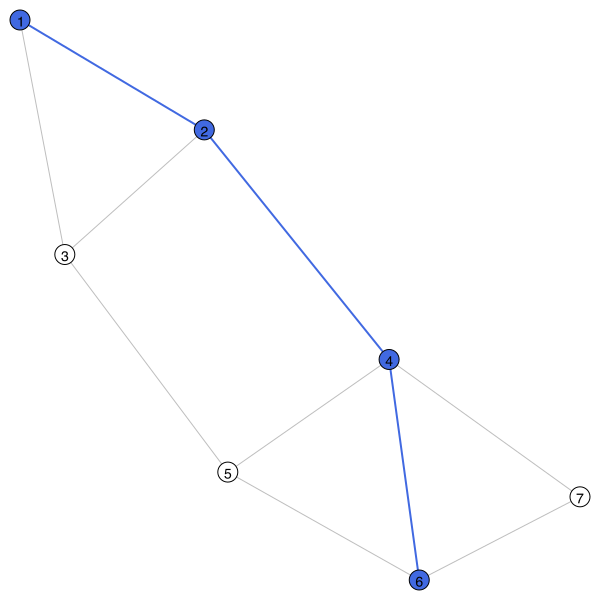

In [27]:
# visualización del diámetro

random.seed(10)

## Convertir los ID de vértices a nombres
vertex_names = [v["name"] for v in g.vs]
diameter_names = [vertex_names[i] for i in d]

## Visualización del diámetro
g.vs["color"] = "white"
g.es["color"] = "grey"
g.es["width"] = 1
g.vs[d]["color"] = "royalblue"

## Obtener los índices de las aristas que están en el camino del diámetro
path_edges = [(d[i], d[i+1]) for i in range(len(d) - 1)]

## Marcar las aristas en el camino del diámetro
for edge in path_edges:
    edge_index = g.get_eid(edge[0], edge[1])
    g.es[edge_index]["color"] = "royalblue"
    g.es[edge_index]["width"] = 2

ig.plot(g, layout = "fr", vertex_label = g.vs["name"])

In [28]:
# distancia geodésica promedio
g.average_path_length()

1.6666666666666667

In [29]:
# distancia geodésica promedio (otra manera)
np.mean(D[np.tril(np.ones(D.shape), k=-1).astype(bool)])

1.6666666666666667

In [30]:
# distribución de las distancias
dist = g.path_length_hist()

## Lo que hay dentro del objeto
print(dist.__dict__, end = "\n\n")

## $res
print(dist._bins, end = "\n\n")

## $unconnected
print(dist.unconnected, end = "\n\n")

{'_bin_width': 1.0, '_bins': [10, 8, 3], '_min': 1.0, '_max': 4.0, '_running_mean': RunningMean(n=21, mean=1.6666666666666667, sd=0.7302967433402215), 'unconnected': 0}

[10, 8, 3]

0



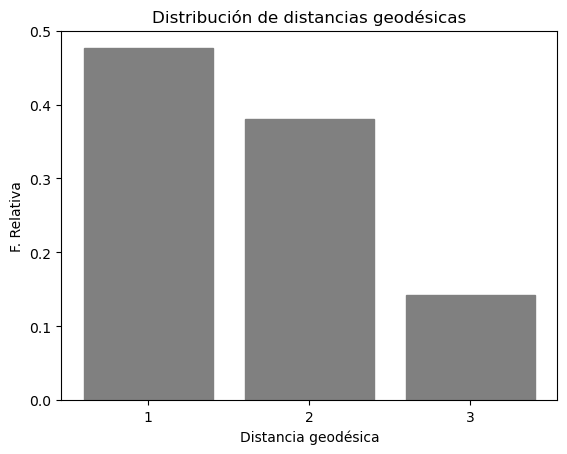

In [31]:
# visualización
senderos = dist._bins

## Asignar nombres a los elementos de la lista
senderos_names = ["1", "2", "3"]

## Crear un gráfico de barras
plt.bar(senderos_names, np.array(senderos) / sum(senderos), color = 'grey', edgecolor = 'grey')

## Configurar etiquetas y título
plt.xlabel('Distancia geodésica')
plt.ylabel('F. Relativa')
plt.title('Distribución de distancias geodésicas')

## Mostrar el gráfico de barras
plt.show()

### Ejercicio 2; 3; 4 y 5

La solución para el ejercicio 2, 3 y 4 que requerían una demostración matemática, y el ejercicio 4 que requería una comprensión teórica, se encuentra detallada en el informe correspondiente al taller titulado [redes - Taller 2 - Valentina Cardona.pdf](). Por favor, consulte dicho informe para más detalles.

### Ejercicio 6

Considere el conjunto de datos dado en `comtrade.RData` (este archivo contiene una arreglo de cuatro dimensiones denominado comtrade), asociado con el crecimiento anual del comercio (diferencia en dólares en escala logarítmica respecto al año 2000). Este conjunto de datos involucra 30 países, 10 años desde 1996 hasta 2005, y 6 clases de productos diferentes, como se muestra a continuación:

In [213]:
# datos
comtrade = rdata.parser.parse_file("./Datos/comtrade.RData")
comtrade = rdata.conversion.convert(comtrade)
comtrade = comtrade["comtrade"]

comtrade = comtrade.to_dataframe(name = 'value').reset_index()

print(comtrade['dim_0'].unique())
print(comtrade['dim_2'].unique())
print(comtrade['dim_3'].unique())

['Australia' 'Austria' 'Brazil' 'Canada' 'China' 'China, Hong Kong SAR'
 'Czech Rep.' 'Denmark' 'Finland' 'France' 'Germany' 'Greece' 'Indonesia'
 'Ireland' 'Italy' 'Japan' 'Malaysia' 'Mexico' 'Netherlands' 'New Zealand'
 'Norway' 'Rep. of Korea' 'Singapore' 'Spain' 'Sweden' 'Switzerland'
 'Thailand' 'Turkey' 'United Kingdom' 'USA']
['Chemicals' 'Crude materials, inedible, except fuels'
 'Food and live animals' 'Machinery and transport equipment'
 'Manufact goods classified chiefly by material'
 'Miscellaneous manufactured articles']
['1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005']


(a) Calcule el aumento medio global $\tilde{y}$ a lo largo de los 10 años en bienes manufacturados. Para ello considere la matriz de adyacencia $Y$ dada por:

In [214]:
## Filtrar
comtrade = comtrade[comtrade["dim_2"].isin(["Manufact goods classified chiefly by material", "Miscellaneous manufactured articles"])].reset_index(drop = True)

## Matriz de adyacencia
Y = comtrade.groupby(['dim_0', 'dim_1']).agg({"value": "mean"}).reset_index().pivot(index = "dim_0", columns = "dim_1", values = "value")
Y = Y.rename_axis(None, axis=0).rename_axis(None, axis=1)
Y.head()

dim_1,Australia,Austria,Brazil,Canada,China,"China, Hong Kong SAR",Czech Rep.,Denmark,Finland,France,...,Norway,Rep. of Korea,Singapore,Spain,Sweden,Switzerland,Thailand,Turkey,USA,United Kingdom
dim_0,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,0.102931,0.084732,0.034879,0.079551,-0.016420,0.183374,0.085059,0.031835,0.017981,...,0.029414,0.019443,-0.075869,0.113773,0.096844,0.010514,-0.013762,0.135197,0.084532,0.081432
Austria,0.083836,NaN,0.060313,0.057183,0.089703,0.057932,0.048708,0.031214,0.029630,0.034787,...,-0.004173,0.007196,0.018856,0.085000,0.033096,0.001295,0.020611,0.116162,0.049532,0.062307
Brazil,-0.057600,0.026306,NaN,0.069744,0.144520,0.013517,0.064837,-0.037100,-0.079644,0.039121,...,0.009589,-0.042804,-0.122657,0.163180,-0.022830,0.022063,0.015188,0.126156,0.045584,0.026421
Canada,0.002869,0.053370,-0.026894,NaN,0.097591,0.003946,0.041238,0.025930,-0.007394,-0.001503,...,0.041124,-0.015649,-0.035125,0.071929,-0.043209,0.019135,0.001399,0.082834,0.044747,0.057367
China,0.132537,0.118548,0.141158,0.161668,NaN,0.024918,0.248491,0.139456,0.156607,0.130919,...,0.128871,0.124398,0.078946,0.168432,0.174294,0.091045,0.141130,0.209001,0.139090,0.203799


In [215]:
# Aumento medio global

## Uso de función
MediaGlobal(Y)

0.038

(b) Calcule la media de todas las observaciones de cada fila de $Y$, es decir, calcule la media fila $\tilde{y}_{i}\cdot = \frac{1}{n-1} \sum_{j:j\neq i} y_{i,j}$ para cada país. Realice una histograma de los promedios fila $\tilde{y}_{i}\cdot$. Los promedios fila caracterizan diferentes niveles de actividad de los nodos en términos de la sociabilidad. ¿Cómo se pueden interpretar los promedios fila $\tilde{y}_{i}\cdot$ en este caso?

In [216]:
# Media de cada fila
mean_row = Y.sum(axis = 1) / (Y.shape[1] - 1)
mean_row

dim_0
Australia               0.044484
Austria                 0.038781
Brazil                  0.015029
Canada                  0.015922
China                   0.147716
China, Hong Kong SAR    0.002366
Czech Rep.              0.094097
Denmark                 0.038871
Finland                 0.025872
France                  0.021648
Germany                 0.032212
Greece                  0.020694
Indonesia               0.035446
Ireland                 0.045016
Italy                   0.018296
Japan                   0.013768
Malaysia                0.050017
Mexico                  0.039307
Netherlands             0.045738
New Zealand             0.046900
Norway                  0.029834
Rep. of Korea           0.022289
Singapore               0.020619
Spain                   0.040501
Sweden                  0.033903
Switzerland             0.023375
Thailand                0.054769
Turkey                  0.100510
USA                     0.009137
United Kingdom          0.006393
dtyp

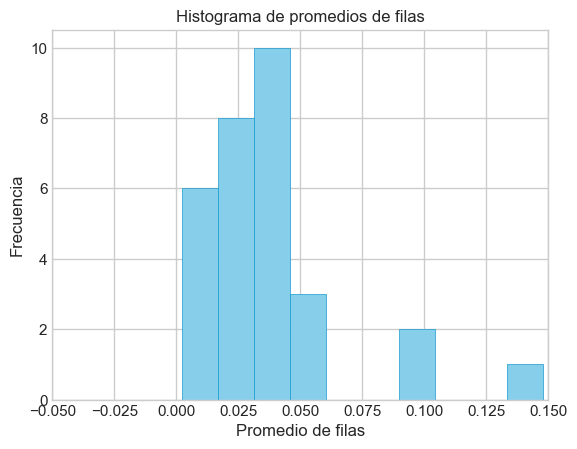

In [249]:
# Crear el histograma

plt.style.use('seaborn-v0_8-whitegrid')

plt.hist(mean_row, facecolor = 'skyblue', edgecolor = '#169acf', linewidth = 0.5)
plt.xlabel('Promedio de filas')
plt.ylabel('Frecuencia')
plt.title('Histograma de promedios de filas')
plt.xlim([-0.05, 0.15])
plt.show()

(c) Calcule la media de todas las observaciones de cada columna de $Y$, es decir, calcule la media columna $\tilde{y}_{\cdot j} = \frac{1}{n-1} \sum_{i:i\neq j} y_{i,j}$ para cada país. Realice una histograma de los promedios columna $\tilde{y}_{\cdot j}$. Los promedios columna caracterizan diferentes niveles de actividad de los nodos en términos de la popularidad. ¿Cómo se pueden interpretar los promedios columna $\tilde{y}_{\cdot j}$ en este caso?

In [218]:
# Media de cada columna
mean_col = Y.sum(axis = 0) / (Y.shape[1] - 1)
mean_col

dim_1
Australia               0.039896
Austria                 0.033859
Brazil                  0.012383
Canada                  0.048230
China                   0.145698
China, Hong Kong SAR   -0.009766
Czech Rep.              0.100692
Denmark                 0.018011
Finland                 0.041021
France                  0.025006
Germany                 0.002417
Greece                  0.025923
Indonesia               0.008393
Ireland                 0.063656
Italy                   0.027721
Japan                  -0.004103
Malaysia                0.003252
Mexico                  0.142069
Netherlands             0.029349
New Zealand             0.034129
Norway                  0.029597
Rep. of Korea           0.025490
Singapore              -0.025241
Spain                   0.074028
Sweden                  0.032045
Switzerland             0.004079
Thailand                0.015269
Turkey                  0.111075
USA                     0.046447
United Kingdom          0.032885
dtyp

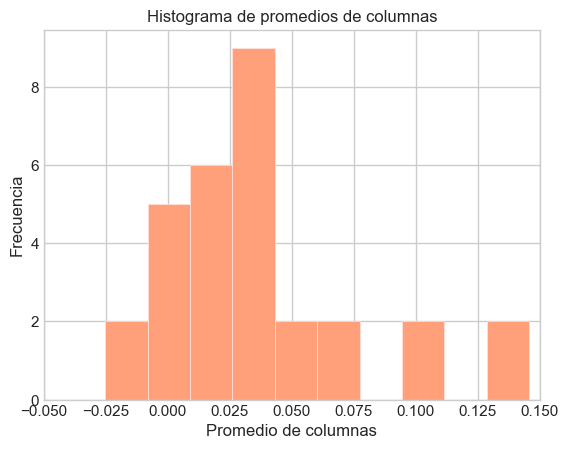

In [248]:
# Crear el histograma

plt.style.use('seaborn-v0_8-whitegrid')

plt.hist(mean_col, facecolor = 'lightsalmon', edgecolor = 'mistyrose', linewidth = 0.5)
# Agregar etiquetas y título
plt.xlabel('Promedio de columnas')
plt.ylabel('Frecuencia')
plt.title('Histograma de promedios de columnas')
plt.xlim([-0.05, 0.15])
plt.show()

(d) Calcule tanto la media de los promedios fila $\tilde{y}_{i} \cdot$ como la media de los promedios columna $\tilde{y}_{\cdot j}$. ¿Qué se puede concluir?

In [224]:
print("Media de promedios fila: ", round(mean_row.mean(), 4))
print("Media de promedios columna: ", round(mean_col.mean(), 4))

Media de promedios fila  0.0378
Media de promedios columna  0.0378


(d) Calcule tanto la DE de los promedios fila $\tilde{y}_{i} \cdot$ como la DE de los promedios columna $\tilde{y}_{\cdot j}$. ¿Qué se puede concluir?

In [232]:
print("DE de promedios fila: ", round(mean_row.std(), 3))
print("DE de promedios columna: ", round(mean_col.std(), 3))

DE de promedios fila:  0.03
DE de promedios columna:  0.041


(f) Calcule el coeficiente de correlación entre los promedios fila $\tilde{y}_{i} \cdot$ y los promedios columna $\tilde{y}_{\cdot j}$. Realice un dispersograma de los promedios columna $\tilde{y}_{\cdot j}$ (eje y) frente a los promedios fila $\tilde{y}_{i} \cdot$ (eje x), junto con la recta $y = x$ como punto de referencia. ¿Qué se puede concluir?

In [251]:
# Calcular el coeficiente de correlación
print("Coeficiente de correlación: ", round(mean_row.corr(mean_col), 3))

Coeficiente de correlación:  0.7


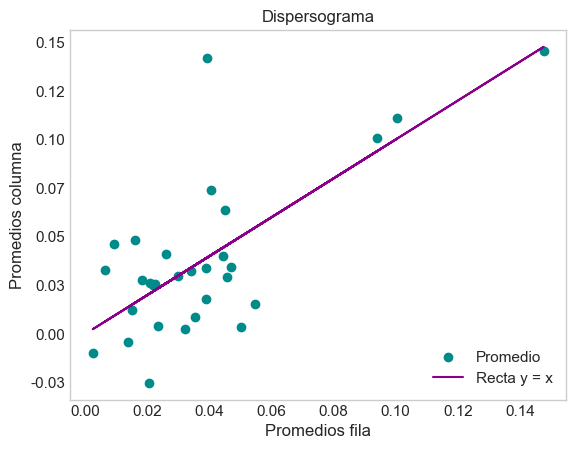

In [262]:
# Crear el dispersograma

plt.scatter(mean_row, mean_col, color = "darkcyan", label = 'Promedio')
plt.plot(mean_row, mean_row, color = 'darkmagenta', label = 'Recta y = x')

## Configurar los ejes con 2 decimales
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2f}'.format(y)))

## Etiquetas y título
plt.xlabel('Promedios fila')
plt.ylabel('Promedios columna')
plt.title('Dispersograma')
plt.legend()

# Cambiar el color del fondo del gráfico y del grid a blanco
plt.gca().set_facecolor('white')
plt.grid(color = 'white')

plt.show()

### Ejercicio 7

Considere el conjunto de datos dado en `conflict.RData` recopilado por Mike Ward y Xun Cao del departamento de Ciencias Políticas de la Universidad de Washington. Estos datos están asociados con datos de conflictos entre países en los años 90. El archivo `conflict.RData` contiene una lista con tres arreglos, **X**, **Y**, y **D**. **X** tiene tres campos: `population` (población en millones), `gdp` (PIB en millones de dolares), `polity` (puntuación política: índice de democracia). $Y$ hace referencia a una matriz ${Y}=[y_{i,j}]$ en la que $y_{i,j}$ representa el número de conflictos iniciados por el país $i$ hacia el país $j$. Finalmente, **D** es un arreglo de tres dimensiones dimensiones cuya tercera dimensión contiene índices entre cada par de países asociados con: comercio (dimensión 1), importaciones (dimensión 2), organizaciones intergubernamentales (dimensión 3) y distancia geográfica (dimensión 4).

In [318]:
## Leer datos
conflict = rdata.parser.parse_file("./Datos/conflict.RData")
conflict = rdata.conversion.convert(conflict)

print(conflict["dat"].keys(), end = "\n\n")

## Matriz X
X = conflict["dat"]["X"].to_dataframe(name = 'value').reset_index().pivot(index = "dim_0", columns = "dim_1", values = "value").reset_index()
X = X.rename(columns = {"dim_0": "country"}).rename_axis(None, axis = 1)
print(X.columns, end = "\n\n")

## Matriz Y
Y = conflict["dat"]["Y"].to_dataframe(name = 'value').reset_index().pivot(index = "dim_0", columns = "dim_1", values = "value")
Y = Y.rename_axis(None, axis = 0).rename_axis(None, axis = 1)
for index in Y.index.intersection(Y.columns):
    Y.loc[index, index] = np.nan
print(Y.columns, end = "\n\n")

## Matriz D
D = conflict["dat"]["D"].to_dataframe(name = 'value').reset_index().pivot(index = ["dim_0", "dim_1"], columns = "dim_2", values = "value")
D = D.rename_axis(None, axis = 1).reset_index().rename(columns = {"dim_0" : "country_1", "dim_1" : "country_2"})
mask = (D['country_1'] == D['country_2'])
D.loc[mask, ['distance', "imports", "polity_int", "shared_igos"]] = np.nan
print(D.columns)

dict_keys(['X', 'Y', 'D'])

Index(['country', 'gdp', 'polity', 'population'], dtype='object')

Index(['AFG', 'ALB', 'ALG', 'ANG', 'ARG', 'AUL', 'AUS', 'BAH', 'BEL', 'BEN',
       ...
       'TUR', 'UAE', 'UGA', 'UKG', 'URU', 'USA', 'VEN', 'YEM', 'ZAM', 'ZIM'],
      dtype='object', length=130)

Index(['country_1', 'country_2', 'distance', 'imports', 'polity_int',
       'shared_igos'],
      dtype='object')


(a) Elabore una visualización decorada de la red de conflictos teniendo en cuenta diferentes diseños.

In [ ]:
dg = ig.Graph.Weighted_Adjacency(Y)

(b) Calcule e interprete la media global.

In [319]:
MediaGlobal(Y)

0.018

(c) Obtenga y grafique la distribución del *out-degree* y del *in-degree*. Calcule e interprete la media y la desviación estándar de esta distribución.

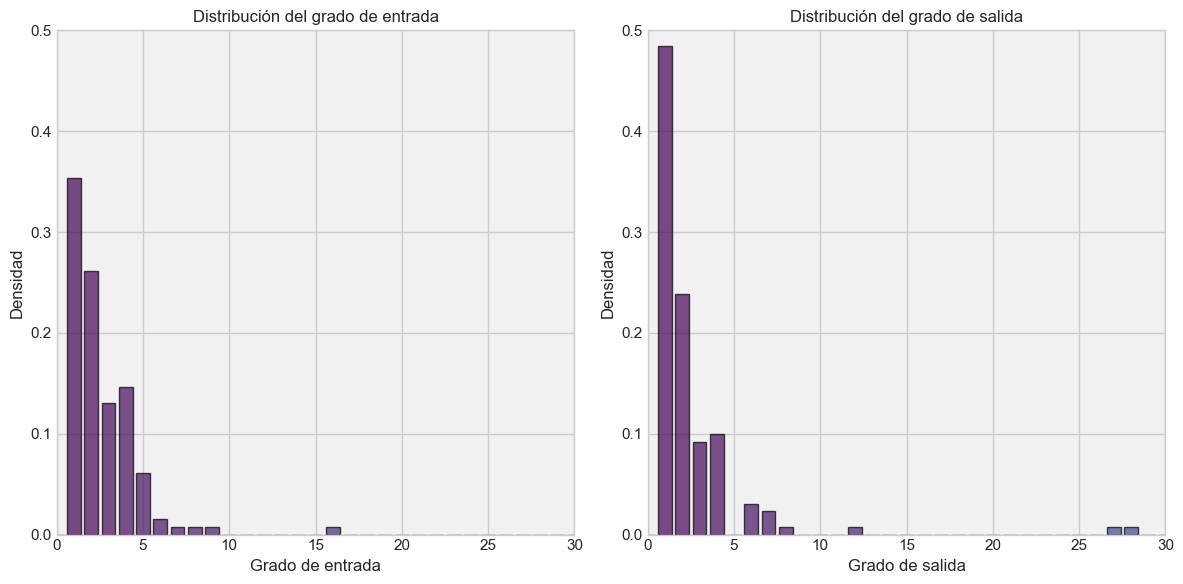

In [336]:
# lista de Vértices
vertices = dg.get_vertex_dataframe()["name"].tolist()
n = dg.vcount()
# Out-degree
out_degree = dg.outdegree()
# In_degree
in_degree = dg.indegree()


# Visualización
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

## Grado de entrada
density = np.histogram(in_degree, bins = 30)[0] / n
colors = plt.cm.viridis(np.linspace(0, 1, len(density)))  # Selecciona colores de la paleta 'viridis'
for i, color in enumerate(colors):
    axes[0].bar(i, density[i], color=color, alpha=0.7, edgecolor='black')  # Cambia el color y ajusta la transparencia

axes[0].set_xlabel('Grado de entrada')
axes[0].set_ylabel('Densidad')
axes[0].set_title('Distribución del grado de entrada')
axes[0].set_xlim([0, 30])
axes[0].set_ylim([0, 0.5])

# Gráfico de barras de la densidad del grado de entrada
density = np.histogram(out_degree, bins = 30)[0] / n
colors = plt.cm.viridis(np.linspace(0, 1, len(density)))  # Selecciona colores de la paleta 'viridis'
for i, color in enumerate(colors):
    axes[1].bar(i, density[i], color=color, alpha=0.7, edgecolor='black')  # Cambia el color y ajusta la transparencia

axes[1].set_xlabel('Grado de salida')
axes[1].set_ylabel('Densidad')
axes[1].set_title('Distribución del grado de salida')
axes[1].set_xlim([0, 30])
axes[1].set_ylim([0, 0.5])

# Ajusta el fondo más transparente
for ax in axes:
    ax.set_facecolor('lightgray')  # Cambia el color de fondo
    ax.patch.set_alpha(0.3)  # Ajusta la transparencia del fondo

plt.tight_layout()
plt.show()


In [ ]:
## Calcular el número de vértices y el grado de cada nodo

d = dg.degree()

### Ejercicio 8

### Ejercicio 9